In [1]:
# !pip install yfinance
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scikit-learn
# !pip install keras


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from datetime import datetime, timedelta


In [3]:
# 1. Load Polkadot data from yfinance
end_date = datetime.now().strftime("%Y-%m-%d")
data = yf.download('DOT-USD', start='2015-01-01', end=end_date)

# Display the first few rows of the data
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                     Adj Close     Close      High       Low      Open  \
Ticker                      DOT-USD   DOT-USD   DOT-USD   DOT-USD   DOT-USD   
Date                                                                          
2020-08-20 00:00:00+00:00  2.900080  2.900080  3.077784  2.692896  2.787857   
2020-08-21 00:00:00+00:00  2.875028  2.875028  3.090093  2.730919  2.896923   
2020-08-22 00:00:00+00:00  4.484690  4.484690  4.510613  2.816762  2.878570   
2020-08-23 00:00:00+00:00  3.967066  3.967066  4.487058  3.716271  4.487058   
2020-08-24 00:00:00+00:00  4.602614  4.602614  4.783158  3.812670  3.987413   

Price                         Volume  
Ticker                       DOT-USD  
Date                                  
2020-08-20 00:00:00+00:00   48819867  
2020-08-21 00:00:00+00:00   49313137  
2020-08-22 00:00:00+00:00  485801096  
2020-08-23 00:00:00+00:00  320749483  
2020-08-24 00:00:00+00:00  407690171  


In [4]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DOT-USD,DOT-USD,DOT-USD,DOT-USD,DOT-USD,DOT-USD
Date,,,,,,
2024-11-22 00:00:00+00:00,6.662623,6.662623,6.676760,5.890711,5.938007,942446028
2024-11-23 00:00:00+00:00,8.508301,8.508301,9.387111,6.615413,6.662623,3276644224
2024-11-24 00:00:00+00:00,8.813535,8.813535,10.287909,8.174574,8.508301,3405320353
2024-11-25 00:00:00+00:00,8.244422,8.244422,9.338971,8.128592,8.813633,1278225222
2024-11-26 00:00:00+00:00,8.078128,8.078128,8.453029,7.583654,8.244422,984978319


In [5]:
print(data.columns)

MultiIndex([('Adj Close', 'DOT-USD'),
            (    'Close', 'DOT-USD'),
            (     'High', 'DOT-USD'),
            (      'Low', 'DOT-USD'),
            (     'Open', 'DOT-USD'),
            (   'Volume', 'DOT-USD')],
           names=['Price', 'Ticker'])


In [6]:
# 2. Prepare the data
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data = data[['Close']]  # Keep only 'Close' price
data.dropna(inplace=True)

In [7]:
# 3. Train-test split
train_data = data[:-100]
test_data = data[-100:]

In [8]:
# 4. Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data)

In [9]:
# 5. Prepare sequences
base_days = 100
x_train, y_train = [], []
for i in range(base_days, len(train_data_scaled)):
    x_train.append(train_data_scaled[i - base_days:i])
    y_train.append(train_data_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [10]:
# 6. Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 7. Train the model
model.fit(x_train, y_train, epochs=50, verbose=1)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.0511
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0091
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0072
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - loss: 0.0062
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0058
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0064
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0048
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - loss: 0.0053
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0043
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0040
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0046
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - loss: 0.0042
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0048
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - loss: 0.0040
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - l

In [12]:
# 8. Prepare test data
total_data = pd.concat((train_data, test_data), axis=0, ignore_index=True)
test_data_scaled = scaler.transform(total_data)
x_test, y_test = [], []
for i in range(base_days, len(test_data_scaled)):
    x_test.append(test_data_scaled[i - base_days:i])
    y_test.append(test_data_scaled[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# 9. Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step


In [14]:
# 10. Predict future prices for 5 days
future_prices = {}
current_input = test_data_scaled[-base_days:]  # Start with the last 100 days
for i in range(1, 6):  # Predict for the next 5 days
    future_pred = model.predict(current_input.reshape(1, base_days, 1))
    future_date = (datetime.now() + timedelta(days=i)).strftime('%Y-%m-%d')
    future_prices[future_date] = scaler.inverse_transform(future_pred)[0][0]
    current_input = np.append(current_input[1:], future_pred, axis=0)  # Slide the window


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


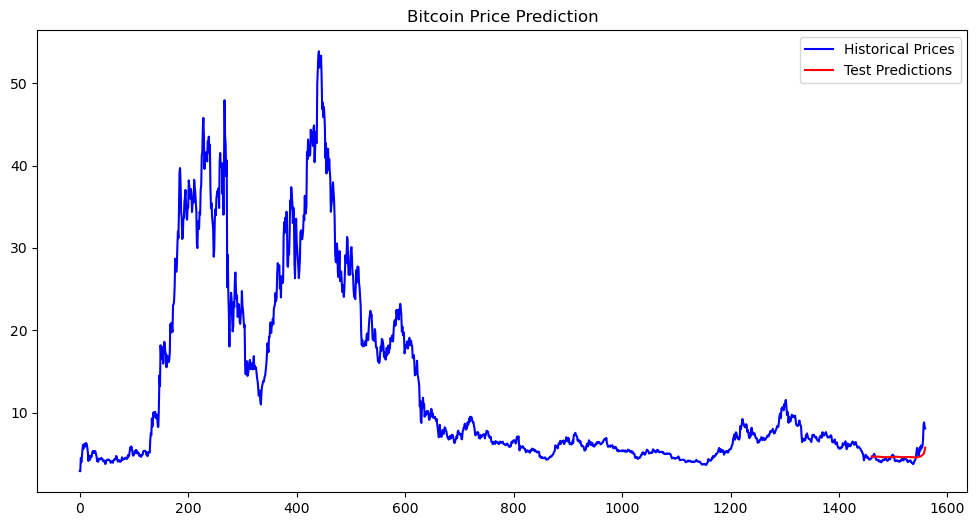

In [15]:
# Adjust predictions to match the last 100 test samples
test_predictions = predictions[-100:]  # Take the last 100 predictions

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Historical Prices", color="blue")
plt.plot(range(len(data) - 100, len(data)), test_predictions, label="Test Predictions", color="red")
plt.title("Bitcoin Price Prediction")
plt.legend()
plt.show()

In [16]:
# 11. Results: Display future prices in a table and save to CSV
future_prices_df = pd.DataFrame(
    list(future_prices.items()), columns=["Date","PredictedPrice"]
)

# Save the table to a CSV file
future_prices_df.to_csv("DOT_future_predicted_prices.csv", index=False)

# Display the table in the notebook
future_prices_df


,Date,PredictedPrice
0,2024-11-29,6.106121
1,2024-11-30,6.373960
2,2024-12-01,6.546244
3,2024-12-02,6.641459
4,2024-12-03,6.683129
